# Boston Data

## Validation Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

In [5]:
boston_data = load_boston()
X, y = boston_data.data, boston_data.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_name = 'alpha'
param_range = np.logspace(-5, 2, 10)

In [9]:
train_scores, valid_scores = validation_curve(Ridge(),X, y, param_name, param_range)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

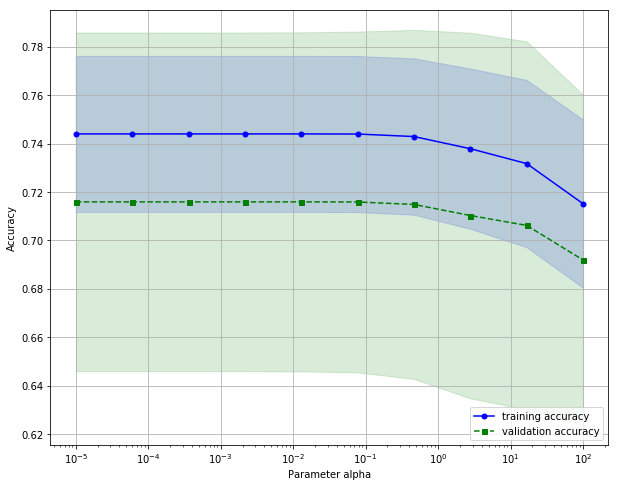

In [16]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()

## Learning Curve

In [18]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [23]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
train_sizes=np.linspace(.1, 1.0, 5)

In [33]:
train_sizes, train_scores, valid_scores = learning_curve(Ridge(), X, y, cv=cv, n_jobs=4, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

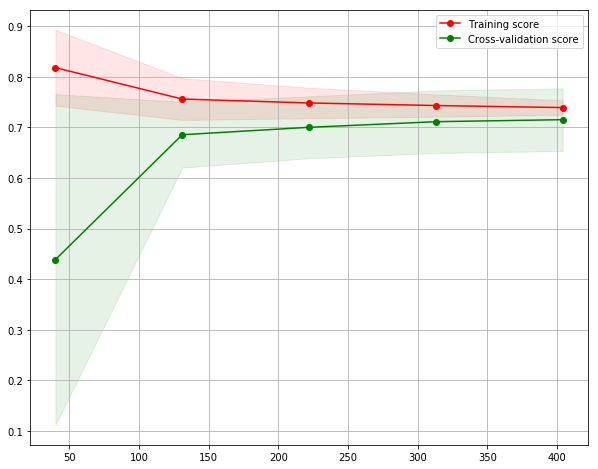

In [35]:
plt.figure(figsize=(10, 8))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

plt.show()